In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('Fake news classification data/train.csv')
test = pd.read_csv('Fake news classification data/test.csv')

In [3]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
train.fillna('missing', inplace=True)

In [6]:
X = train.drop('label', axis=1)
y = train['label']

In [7]:
X.shape

(20800, 4)

In [8]:
y.shape

(20800,)

In [9]:
import tensorflow as tf

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout

### creating one-hot representation of text

In [11]:
messages = X.copy()

In [12]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [13]:
corpus = []
for i in range(len(messages)):
    # removing punctuations from the text
    review = re.sub("[^a-zA-Z]", ' ', messages['title'][i])
    
    # making the text in lower case
    review = review.lower()
    
    # splitting the sentences into words
    review = review.split()
    
    ## removing stopwords and then performing lemmatization on the words
    review = [lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    
    ## joining the words again to make sentences
    review = ' '.join(review)
    
    # appending the preprocessed sentences to corpus list
    corpus.append(review)

In [14]:
corpus

['house dem aide even see comey letter jason chaffetz tweeted',
 'flynn hillary clinton big woman campus breitbart',
 'truth might get fired',
 'civilian killed single u airstrike identified',
 'iranian woman jailed fictional unpublished story woman stoned death adultery',
 'jackie mason hollywood would love trump bombed north korea lack trans bathroom exclusive video breitbart',
 'life life luxury elton john favorite shark picture stare long transcontinental flight',
 'beno hamon win french socialist party presidential nomination new york time',
 'excerpt draft script donald trump q ampa black church pastor new york time',
 'back channel plan ukraine russia courtesy trump associate new york time',
 'obama organizing action partner soros linked indivisible disrupt trump agenda',
 'bbc comedy sketch real housewife isi cause outrage',
 'russian researcher discover secret nazi military base treasure hunter arctic photo',
 'u official see link trump russia',
 'yes paid government troll soc

In [15]:
## vocabulary size
vocab_size = 5000

In [16]:
one_hot_repr = [one_hot(words, vocab_size) for words in corpus]

In [17]:
one_hot_repr

[[703, 1198, 4100, 936, 4199, 2489, 4626, 2438, 380, 953],
 [1611, 4161, 901, 238, 2126, 278, 688],
 [2070, 2555, 4162, 4432],
 [2959, 422, 1342, 488, 3604, 4853],
 [1827, 2126, 273, 2588, 1712, 4339, 2126, 1150, 2085, 130],
 [2127,
  2511,
  2044,
  310,
  849,
  4311,
  829,
  2525,
  1207,
  3023,
  2379,
  4900,
  298,
  4077,
  688],
 [2157, 2157, 3839, 898, 3989, 36, 3986, 1902, 44, 2510, 1277, 3181],
 [2144, 3198, 1735, 2235, 1051, 293, 105, 3695, 4643, 2725, 1535],
 [1868, 1721, 2538, 1804, 4311, 3784, 433, 1582, 2020, 470, 4643, 2725, 1535],
 [4601, 4782, 3473, 1183, 2068, 3390, 4311, 1650, 4643, 2725, 1535],
 [3077, 3273, 95, 921, 1335, 741, 2213, 3447, 4311, 4301],
 [4077, 2517, 3651, 311, 3428, 4598, 4271, 4987],
 [4431, 2199, 1618, 82, 1666, 3454, 4912, 3101, 1648, 1989, 2053],
 [488, 379, 4199, 499, 4311, 2068],
 [4860, 1465, 3807, 2828, 2313, 3549, 3207, 4100, 2625],
 [4122, 1166, 4276, 2258, 4326, 1559, 3655, 4643, 2725, 1535],
 [2899, 3083, 3765, 3529, 1790, 4643, 2725

In [18]:
## common sentence length 
sent_length = 20

In [19]:
embedded_docs = pad_sequences(one_hot_repr, padding='pre', maxlen=sent_length)

In [20]:
embedded_docs

array([[   0,    0,    0, ..., 2438,  380,  953],
       [   0,    0,    0, ..., 2126,  278,  688],
       [   0,    0,    0, ..., 2555, 4162, 4432],
       ...,
       [   0,    0,    0, ..., 4643, 2725, 1535],
       [   0,    0,    0, ...,  537, 3579, 1233],
       [   0,    0,    0, ...,  928, 4352, 2906]])

In [21]:
embedded_docs.shape

(20800, 20)

In [22]:
## creating embedding
no_of_dimensions = 50 # dimensions in embedding array

In [23]:
## vocabulary size
vocab_size = 5000

In [24]:
model = Sequential()
model.add(Embedding(vocab_size, no_of_dimensions, input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(20))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 50)            250000    
                                                                 
 dropout (Dropout)           (None, 20, 50)            0         
                                                                 
 lstm (LSTM)                 (None, 20)                5680      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 255,701
Trainable params: 255,701
Non-trainable params: 0
_________________________________________________________________


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(np.array(embedded_docs,dtype='float32'), np.array(y,dtype='float32'), test_size=0.2, stratify=y)

In [27]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=64)

Epoch 1/5
260/260 [==============================] - 11s 24ms/step - loss: 0.3325 - accuracy: 0.8773 - val_loss: 0.1821 - val_accuracy: 0.9221
Epoch 2/5
260/260 [==============================] - 5s 17ms/step - loss: 0.1432 - accuracy: 0.9443 - val_loss: 0.1725 - val_accuracy: 0.9262
Epoch 3/5
260/260 [==============================] - 6s 24ms/step - loss: 0.1033 - accuracy: 0.9617 - val_loss: 0.1830 - val_accuracy: 0.9296
Epoch 4/5
260/260 [==============================] - 5s 20ms/step - loss: 0.0810 - accuracy: 0.9721 - val_loss: 0.2009 - val_accuracy: 0.9255
Epoch 5/5
260/260 [==============================] - 4s 15ms/step - loss: 0.0611 - accuracy: 0.9799 - val_loss: 0.2225 - val_accuracy: 0.9310


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

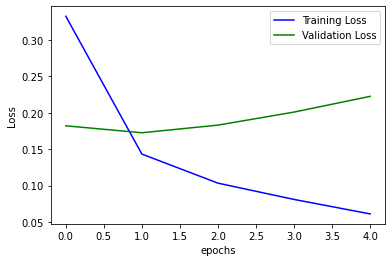

In [29]:
plt.plot(history.history['loss'],color='blue',label='Training Loss')
plt.plot(history.history['val_loss'],color='green',label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

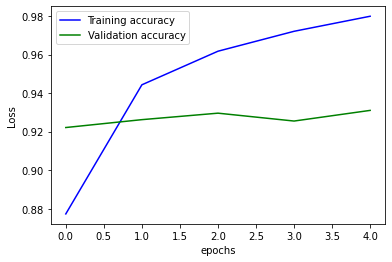

In [30]:
plt.plot(history.history['accuracy'],color='blue',label='Training accuracy')
plt.plot(history.history['val_accuracy'],color='green',label='Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [32]:
test.fillna('missing', inplace=True)

In [33]:
test_corpus = []
for i in range(test.shape[0]):
    # removing punctuations from the text
    review = re.sub(r"[^a-zA-Z]", ' ', test['title'][i])
    
    # making the text in lower case
    review = review.lower()
    
    # splitting the sentences into words
    review = review.split()
    
    ## removing stopwords and then performing lemmatization on the words
    review = [lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    
    ## joining the words again to make sentences
    review = ' '.join(review)
    
    # appending the preprocessed sentences to corpus list
    test_corpus.append(review)

In [34]:
test_corpus

['specter trump loosens tongue purse string silicon valley new york time',
 'russian warship ready strike terrorist near aleppo',
 'nodapl native american leader vow stay winter file lawsuit police',
 'tim tebow attempt another comeback time baseball new york time',
 'keiser report meme war e',
 'trump usa antique hero clinton next president',
 'pelosi call fbi investigation find russian donald trump breitbart',
 'weekly featured profile randy shannon',
 'urban population boom make climate change worse',
 'missing',
 'u general admiral endorse trump commander chief',
 'working class hero john brennon',
 'rise mandatory vaccination mean end medical freedom',
 'communist terrorize small business',
 'computer programmer come forward admits paid rig voting booth trump right usa newsflash',
 'thief take chunk change pound berlin museum new york time',
 'new england patriot owner still sore n f l payback sight new york time',
 'college republican yaf sue berkeley ann coulter event breitbart'

In [35]:
test_one_hot_repr = [one_hot(words, vocab_size) for words in test_corpus]

In [36]:
test_embedded_docs = pad_sequences(test_one_hot_repr, padding='pre', maxlen=sent_length)

In [37]:
## making predictions
predictions = model.predict(np.array(test_embedded_docs))

163/163 [==============================] - 5s 6ms/step


In [38]:
predictions

array([[3.3216161e-04],
       [9.9789417e-01],
       [5.0958848e-01],
       ...,
       [8.6305775e-03],
       [9.5976949e-01],
       [4.0523254e-04]], dtype=float32)

In [39]:
predictions.shape

(5200, 1)

In [40]:
predictions = np.where(np.ndarray.flatten(predictions) < 0.5, 0, 1)
predictions

array([0, 1, 1, ..., 0, 1, 0])

In [41]:
submission = pd.DataFrame()
submission['id'] = test['id']
submission['label'] = predictions

In [43]:
submission.head()

,id,label
0,20800,0
1,20801,1
2,20802,1
3,20803,0
4,20804,1


In [44]:
submission.to_csv('Fake news classification data/lstm_submit.csv',index=False)